In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. EDA

In [2]:
df = pd.read_csv('C:\\Users\\Cash Crusaders\\\Desktop\\My Portfolio\\Projects\\Data Science Projects\\Machine Learning Project 12 - Bangalore House Prediction\dataset\\archive (1)\\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
features_df = df.copy()
features_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# seperate features  with target column
y = df['price']
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [5]:
y_df = df.drop(columns=['area_type','availability','location','size','society','total_sqft','bath','balcony'])
y_df.head()

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [6]:
type(y)

pandas.core.series.Series

### Data Integrity

In [7]:
from deepchecks.tabular.suites import data_integrity
from deepchecks.tabular import Dataset

ds = Dataset(df ,cat_features= ['area_type','availability','location','size','society'], 
              label= 'price')

def data_Integrity(ds):
    '''get dataset/dataframe and conduct integrity check on it'''

    # Run Suite:
    integ_suite = data_integrity()
    suite_result = integ_suite.run(ds)
    # Note: the result can be saved as html using suite_result.save_as_html()
    # or exported to json using suite_result.to_json()
    suite_result.save_as_html('data_integrity.html')
data_Integrity(ds)
    

c:\Anaconda\envs\machine-learning-env\lib\site-packages\deepchecks\core\serialization\suite_result\widget.py:154: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



### Auto EDA

In [10]:
# Pandas profiling
from pandas_profiling import ProfileReport

In [11]:
data_profile = ProfileReport(df, explorative = True)
data_profile.to_file("house_prediction_analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Manual EDA

In [7]:
#shape 
features_df.shape

(13320, 9)

In [8]:
# info
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
features_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
# check null values
features_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
# Area Type
features_df['area_type'] = features_df['area_type'].astype(str)

In [12]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [13]:
# availability
features_df['availability'] = features_df['availability'].astype(str)

In [14]:
# location
features_df.dropna(subset=['location'],inplace=True)

In [15]:
features_df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [16]:
# size
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)


In [17]:
for feature in ['size','society']:
    impute_nan(features_df,feature)

In [18]:
features_df.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [19]:
features_df['bhk'] = features_df['size'].str.split().str.get(0).astype(int)

In [20]:
features_df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00,3


In [21]:
features_df.drop(columns=['size'], inplace=True)

In [22]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   society       13319 non-null  object 
 4   total_sqft    13319 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         13319 non-null  float64
 8   bhk           13319 non-null  int32  
dtypes: float64(3), int32(1), object(5)
memory usage: 988.5+ KB


In [23]:
# total sqft
# change the sq_ft datatype
def convert_range(x):
    #split the row value
    temp = x.split('-')
    # if the temp size is equal to 2
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
# apply the function
features_df['total_sqft'] = features_df['total_sqft'].apply(convert_range)

In [25]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   society       13319 non-null  object 
 4   total_sqft    13273 non-null  float64
 5   bath          13246 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         13319 non-null  float64
 8   bhk           13319 non-null  int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 988.5+ KB


In [26]:
features_df['total_sqft'].median()

1276.0

In [27]:
# impute for numerical features
def impute_numeric_nan(df,variable):
    column_median = df[variable].median()
    df[variable].fillna(column_median,inplace=True)

for numeric_col in ['total_sqft','bath','balcony']:
    impute_numeric_nan(features_df,numeric_col)

In [28]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   society       13319 non-null  object 
 4   total_sqft    13319 non-null  float64
 5   bath          13319 non-null  float64
 6   balcony       13319 non-null  float64
 7   price         13319 non-null  float64
 8   bhk           13319 non-null  int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 988.5+ KB


In [29]:
# proper functions for the process


In [30]:
features_df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,GrrvaGr,1200.0,2.0,1.0,51.00,2


In [89]:
# drop unimportant columns
df.drop(columns=['area_type','availability','society','balcony'], inplace=True)

In [90]:
# describe ddataset
df.describe() # this will only describe the numerical columns

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [91]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [92]:
# lets focus on one column at a time i.e Location
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [93]:
# fill in the value that has null values from the location column
df['location'] = df['location'].fillna('Sarjapur Road')

In [94]:
# attend to size column
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [95]:
# fill in the missing value for size
df['size'] = df['size'].fillna('2 BHK')

In [96]:
# bath
df['bath'] = df['bath'].fillna(df['bath'].median())

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [98]:
#change the data type of teh column bhk values to int
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [99]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [100]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [101]:
# change the sq_ft datatype
def convert_range(x):
    #split the row value
    temp = x.split('-')
    # if the temp size is equal to 2
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None


In [102]:
# apply the function
df['total_sqft'] = df['total_sqft'].apply(convert_range)

In [103]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
# create a new column called price per sqft which is made up of price and total sqft
features_df['price_per_sqft'] =y_df['price'] * 100000/features_df['total_sqft']

In [33]:
features_df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13319, dtype: float64

In [167]:
features_df.head(2)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615


In [104]:
# create a new column called price per sqft which is made up of price and total sqft
df['price_per_sqft'] = df['price'] * 100000/df['total_sqft']

In [105]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [106]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [107]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [34]:
features_df['location'].apply(lambda x : x.strip())

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13319, dtype: object

In [35]:
# usinng strip to remove the white spaces  before creating the location column
features_df['location'] = features_df['location'].apply(lambda x : x.strip())
location_count = features_df['location'].value_counts()

In [36]:
# getting locations that are less than ten
locattion_less_than_10 = location_count[location_count<10]
locattion_less_than_10

Vishwanatha Nagenahalli           9
Chennammana Kere                  9
2nd Phase JP Nagar                9
Jakkur Plantation                 9
B Narayanapura                    9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: location, Length: 1040, dtype: int64

In [37]:
features_df['location'] = features_df['location'].apply(lambda x : 'other' if x in locattion_less_than_10 else x)

In [38]:
features_df['location'].value_counts()

other                  2755
Whitefield              541
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: location, Length: 255, dtype: int64

In [173]:
# Outllier detection and removal
features_df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13319.000000,13319.000000,13319.000000,13319.000000,13319.000000,1.331900e+04
mean,1558.644098,2.688790,1.603349,112.567621,2.802763,7.919595e+03
std,1236.423199,1.338801,0.803090,148.977089,1.294543,1.062511e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266667e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,2.000000,120.000000,3.000000,7.329132e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [39]:
features_df_copy = features_df.copy()

In [175]:
df_copy = df.copy()

In [40]:
features_df_copy.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,GrrvaGr,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,GrrvaGr,1200.0,2.0,1.0,51.00,2,4250.000000


In [41]:
features_df = features_df_copy.copy()

In [42]:
features_df.head(2)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615


In [44]:
(features_df_copy['total_sqft']/features_df_copy['bhk']).describe()

count    13319.000000
mean       575.125820
std        388.147961
min          0.250000
25%        473.000000
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [43]:
features_df = features_df[((features_df['total_sqft']/features_df['bhk']) >= 300)]

In [ ]:
# we want the number, how many bhk for this specific total sqft
df = df[((df['total_sqft']/df['bhk']) >= 300)]

In [104]:
df.shape

(13320, 9)

In [116]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### Vizualization

In [105]:
features_df.head(3)

,area_type,availability,location,society,total_sqft,bath,balcony,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,GrrvaGr,1440.0,2.0,3.0,3,4305.555556


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Area Type
features_df['area_type'].value_counts()

Super built-up  Area    8738
Built-up  Area          2347
Plot  Area              1399
Carpet  Area              83
Name: area_type, dtype: int64

<AxesSubplot:>

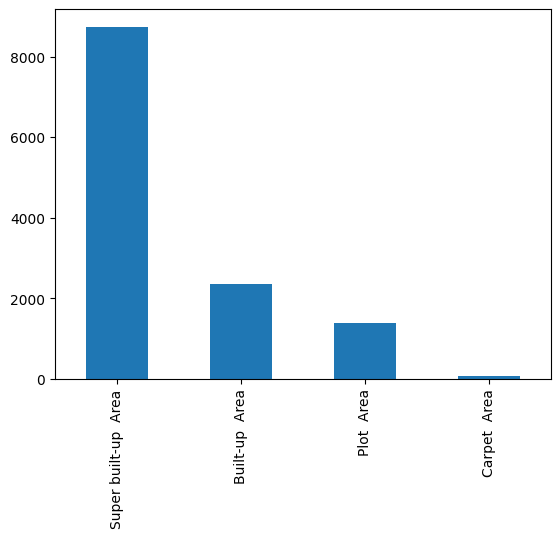

In [49]:
features_df['area_type'].value_counts().plot(kind='bar')

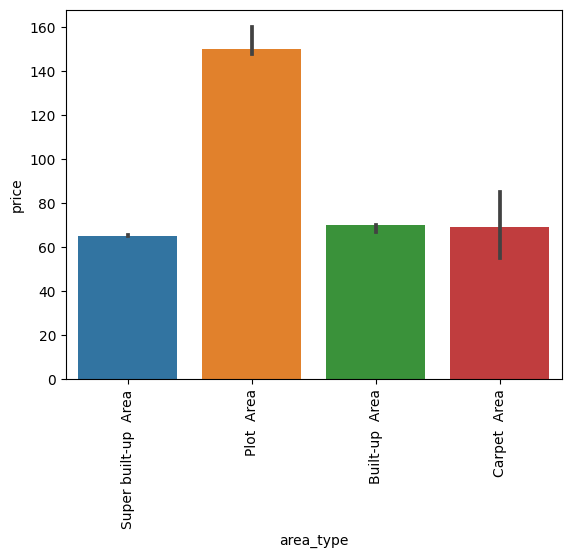

In [52]:
sns.barplot(x=features_df['area_type'],y=y_df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# availability
# all other cat features have a big pool of values which cannot be viz

In [57]:
features_df.columns

Index(['area_type', 'availability', 'location', 'society', 'total_sqft',
       'bath', 'balcony', 'bhk', 'price_per_sqft'],
      dtype='object')

C:\Users\Cash Crusaders\AppData\Local\Temp\ipykernel_8232\2107161817.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features_df['total_sqft'])


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

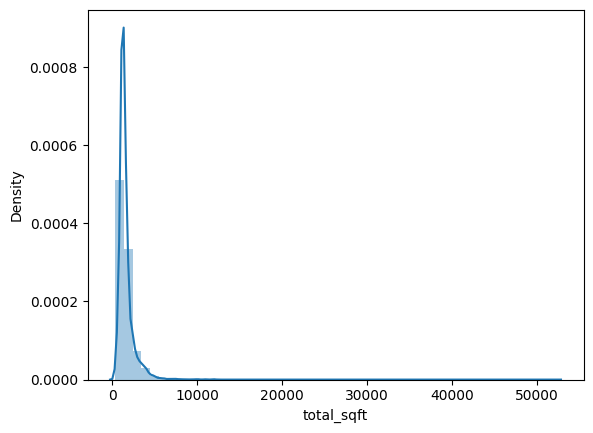

In [59]:
sns.distplot(features_df['total_sqft'])

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

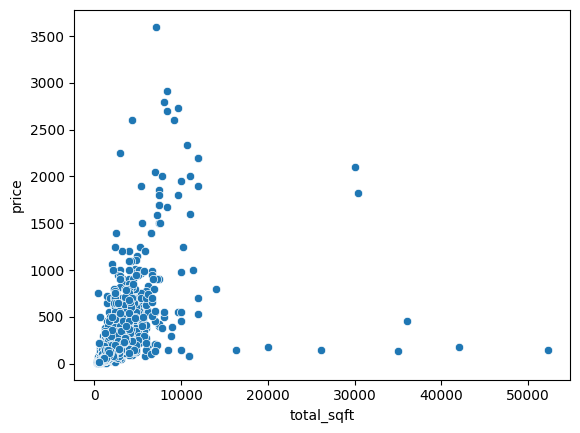

In [61]:
sns.scatterplot(x=features_df['total_sqft'],y=y_df['price'])

<AxesSubplot:>

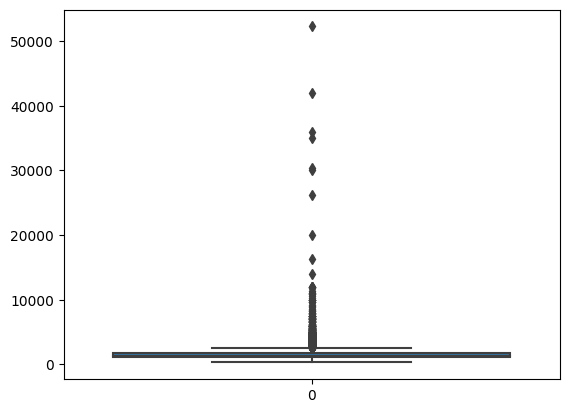

In [63]:
sns.boxplot(features_df['total_sqft'])

C:\Users\Cash Crusaders\AppData\Local\Temp\ipykernel_8232\4093031122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bath'])


<AxesSubplot:xlabel='bath', ylabel='Density'>

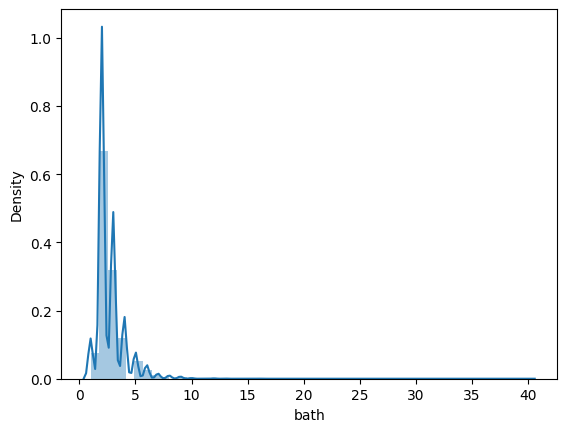

In [65]:
sns.distplot(df['bath'])

In [64]:
features_df.columns

Index(['area_type', 'availability', 'location', 'society', 'total_sqft',
       'bath', 'balcony', 'bhk', 'price_per_sqft'],
      dtype='object')

<AxesSubplot:xlabel='bath', ylabel='price'>

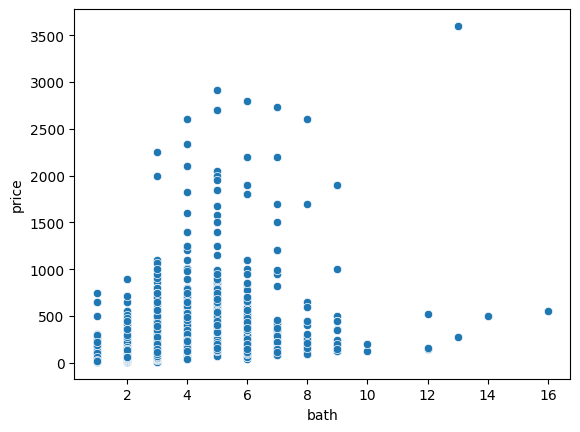

In [66]:
sns.scatterplot(x=features_df['bath'],y=y_df['price'])

<AxesSubplot:>

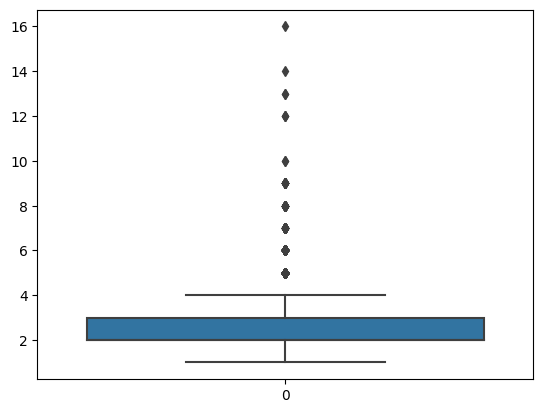

In [67]:
sns.boxplot(features_df['bath'])

In [69]:
features_df.columns

Index(['area_type', 'availability', 'location', 'society', 'total_sqft',
       'bath', 'balcony', 'bhk', 'price_per_sqft'],
      dtype='object')

C:\Users\Cash Crusaders\AppData\Local\Temp\ipykernel_8232\3797560942.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['balcony'])


<AxesSubplot:xlabel='balcony', ylabel='Density'>

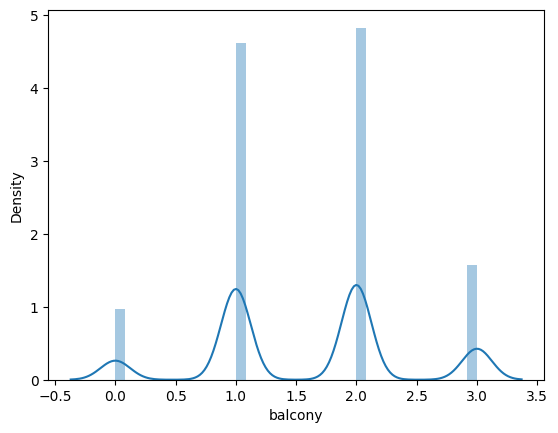

In [70]:
#  balcony
sns.distplot(df['balcony'])

<AxesSubplot:xlabel='balcony', ylabel='price'>

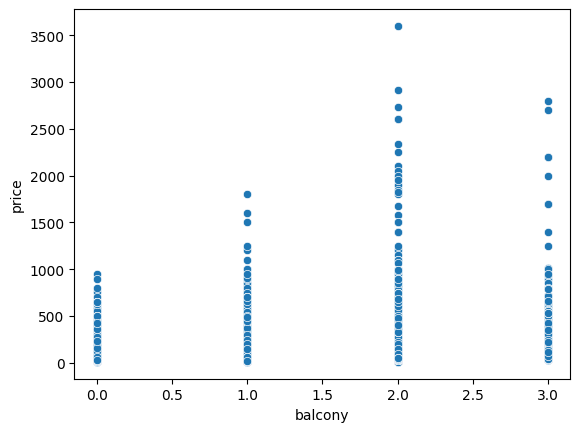

In [71]:
sns.scatterplot(x=features_df['balcony'],y=y_df['price'])

<AxesSubplot:>

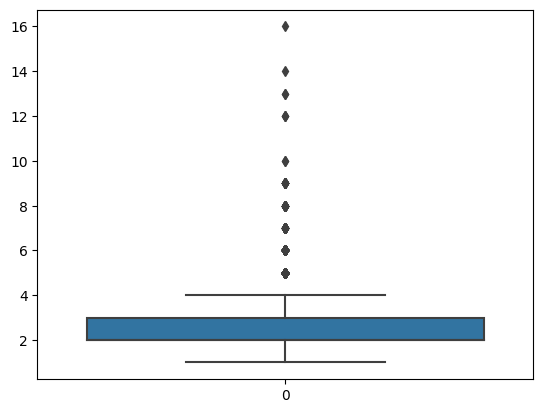

In [72]:
sns.boxplot(features_df['bath'])

In [73]:
features_df.columns

Index(['area_type', 'availability', 'location', 'society', 'total_sqft',
       'bath', 'balcony', 'bhk', 'price_per_sqft'],
      dtype='object')

C:\Users\Cash Crusaders\AppData\Local\Temp\ipykernel_8232\3140891953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features_df['bhk'])


<AxesSubplot:xlabel='bhk', ylabel='Density'>

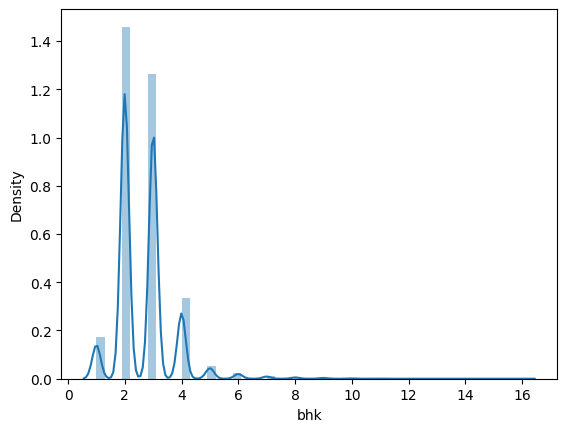

In [75]:
# BHK ( bedroom, hall and kitchen)
sns.distplot(features_df['bhk'])


<AxesSubplot:xlabel='bhk', ylabel='price'>

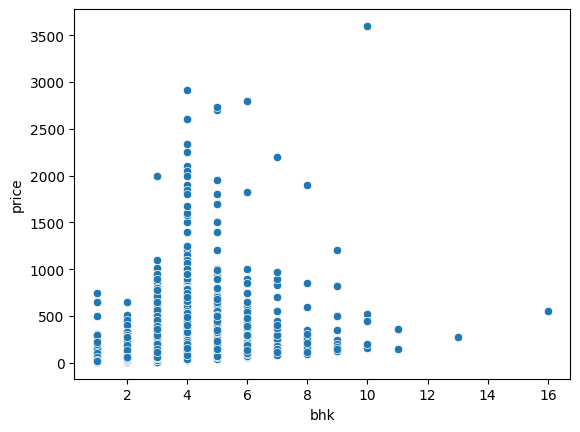

In [76]:
sns.scatterplot(x=features_df['bhk'],y=y_df['price'])

<AxesSubplot:>

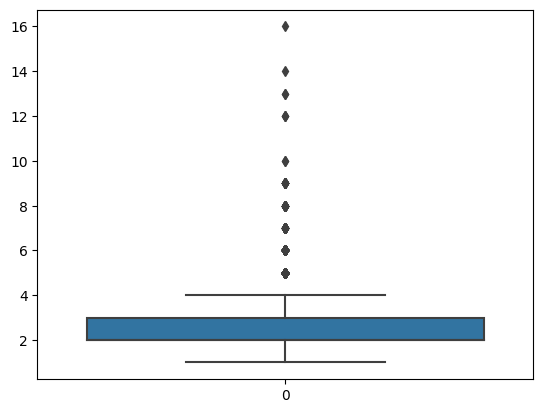

In [77]:
sns.boxplot(features_df['bath'])

In [78]:
features_df.columns

Index(['area_type', 'availability', 'location', 'society', 'total_sqft',
       'bath', 'balcony', 'bhk', 'price_per_sqft'],
      dtype='object')

C:\Users\Cash Crusaders\AppData\Local\Temp\ipykernel_8232\2673721467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features_df['price_per_sqft'])


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

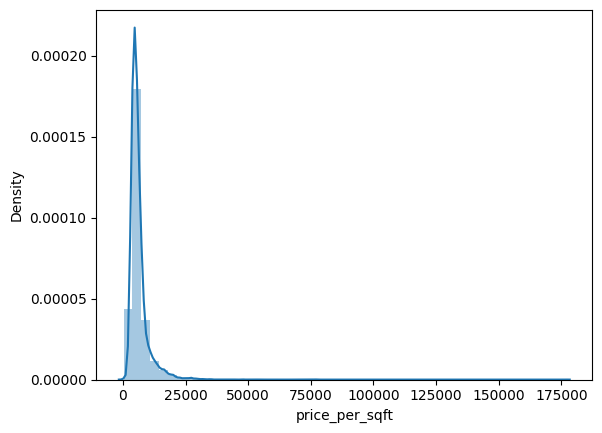

In [79]:
# price_per_sqft
sns.distplot(features_df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft', ylabel='price'>

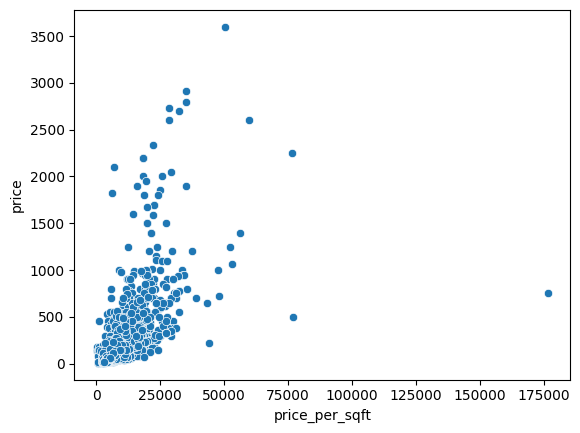

In [80]:
sns.scatterplot(x=features_df['price_per_sqft'],y=y_df['price'])

<AxesSubplot:>

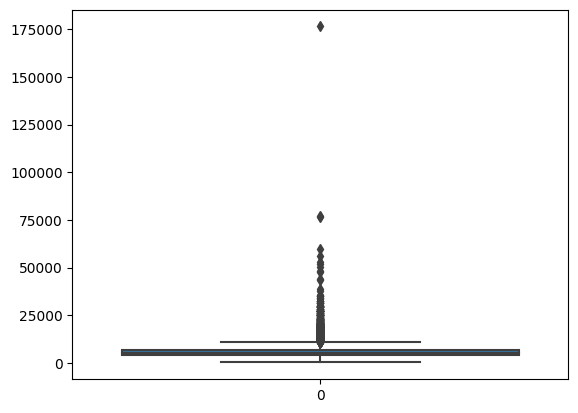

In [81]:
sns.boxplot(features_df['price_per_sqft'])

In [44]:
# removee the outliers
def remove_outliers(df,numeric_features_list):
    for column_name in numeric_features_list:
        # calculate the Quantiles(Q1 and Q3)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        # calclulate the Inter_quatile_range IQR
        IQR = Q3 - Q1
        # calculate the lower limit and upper  limit (LL & UL)
        LL = Q1 - 1.5 * IQR
        UL = Q3 + 1.5 * IQR
        # now filter the column to remove the outliers
        # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
        df.loc[df[column_name] <= LL, column_name] = LL
        # do the same for values greater than the UL
        df.loc[df[column_name] >= UL, column_name] = UL
    return df
    

In [45]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12567 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12567 non-null  object 
 1   availability    12567 non-null  object 
 2   location        12567 non-null  object 
 3   society         12567 non-null  object 
 4   total_sqft      12567 non-null  float64
 5   bath            12567 non-null  float64
 6   balcony         12567 non-null  float64
 7   price           12567 non-null  float64
 8   bhk             12567 non-null  int32  
 9   price_per_sqft  12567 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.0+ MB


In [46]:
features_list = ['total_sqft','bath', 'balcony', 'bhk', 'price_per_sqft']
features_df = remove_outliers(features_df,features_list)

<AxesSubplot:>

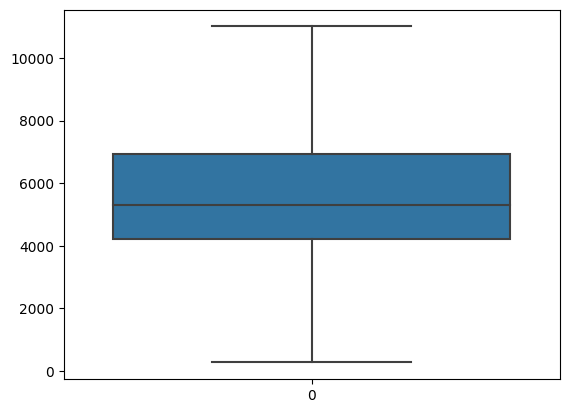

In [183]:
sns.boxplot(features_df['price_per_sqft'])

In [47]:
features_df_copy_2 = features_df.copy()

In [48]:
features_df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.00,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2573.75,4.5,3.0,120.00,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,GrrvaGr,1440.00,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.00,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,GrrvaGr,1200.00,2.0,1.0,51.00,2.0,4250.000000


In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [98]:
column_transformer = make_column_transformer((OneHotEncoder(sparse=False), [0,1,2,3]), remainder='passthrough')
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
transformed_features = np.array(column_transformer.fit_transform(features_df))

In [100]:
transformed_features.shape

(12567, 3018)

<AxesSubplot:>

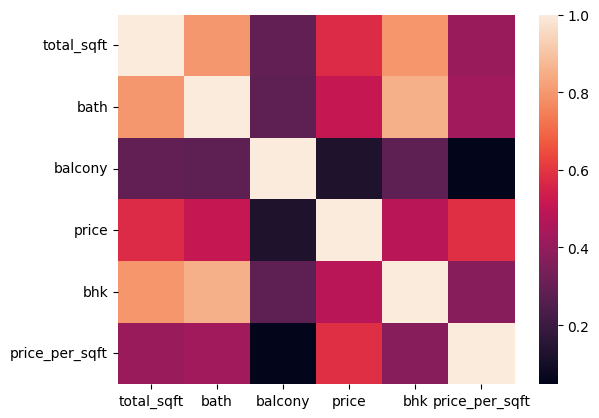

In [50]:
sns.heatmap(features_df.corr())

In [187]:
for feature in features_df.columns[:]:
    print(feature,":",len(features_df[feature].unique()),'labels')

area_type : 4 labels
availability : 81 labels
location : 255 labels
society : 2673 labels
total_sqft : 1528 labels
bath : 5 labels
balcony : 4 labels
price : 1985 labels
bhk : 5 labels
price_per_sqft : 6843 labels


In [51]:
area_type_map=features_df['area_type'].value_counts().to_dict()
features_df['area_type']=features_df['area_type'].map(area_type_map)
features_df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,8738,19-Dec,Electronic City Phase II,Coomee,1056.00,2.0,1.0,39.07,2.0,3699.810606
1,1399,Ready To Move,Chikka Tirupathi,Theanmp,2573.75,4.5,3.0,120.00,4.0,4615.384615
2,2347,Ready To Move,Uttarahalli,GrrvaGr,1440.00,2.0,3.0,62.00,3.0,4305.555556
3,8738,Ready To Move,Lingadheeranahalli,Soiewre,1521.00,3.0,1.0,95.00,3.0,6245.890861
4,8738,Ready To Move,Kothanur,GrrvaGr,1200.00,2.0,1.0,51.00,2.0,4250.000000


In [52]:

# availability
availability_map=features_df['availability'].value_counts().to_dict()
features_df['availability']=features_df['availability'].map(availability_map)
#location
location_map=features_df['location'].value_counts().to_dict()
features_df['location']=features_df['location'].map(location_map)
# society
society_map=features_df['society'].value_counts().to_dict()
features_df['society']=features_df['society'].map(society_map)
features_df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,8738,184,127,5,1056.00,2.0,1.0,39.07,2.0,3699.810606
1,1399,9860,17,13,2573.75,4.5,3.0,120.00,4.0,4615.384615
2,2347,9860,180,4876,1440.00,2.0,3.0,62.00,3.0,4305.555556
3,8738,9860,23,22,1521.00,3.0,1.0,95.00,3.0,6245.890861
4,8738,9860,63,4876,1200.00,2.0,1.0,51.00,2.0,4250.000000


<AxesSubplot:>

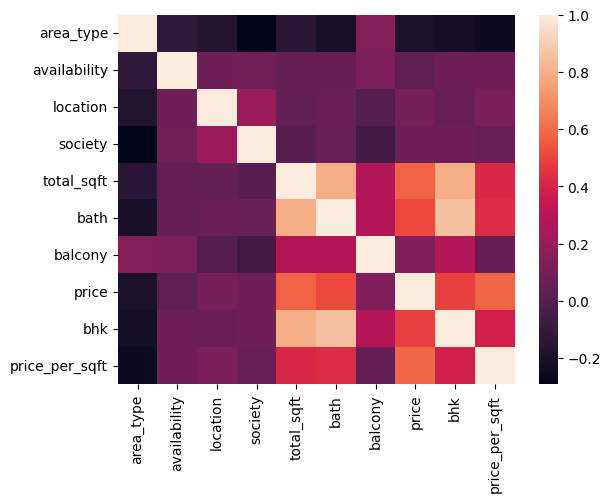

In [53]:
sns.heatmap(features_df.corr())

In [54]:
features_df.shape

(12567, 10)

In [55]:
features_df_copy_2 = features_df.copy()

In [56]:
features_df = features_df_copy_2.copy()

In [59]:
y = features_df.drop(columns=['area_type','availability','location','society','total_sqft','bath','balcony','bhk','price_per_sqft'])

In [61]:
y['price'].head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [71]:
y

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00
...,...
13315,231.00
13316,400.00
13317,60.00
13318,488.00


In [62]:
features_df.drop(columns=['price'], inplace=True)

In [63]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
import matplotlib.pyplot as plt
selection_model=ExtraTreesRegressor()
selection_model.fit(features_df,y['price'])

ExtraTreesRegressor()

In [64]:
print(selection_model.feature_importances_)

[0.0423274  0.03423095 0.06084156 0.04106152 0.29104944 0.08040732
 0.04002155 0.08187267 0.32818759]


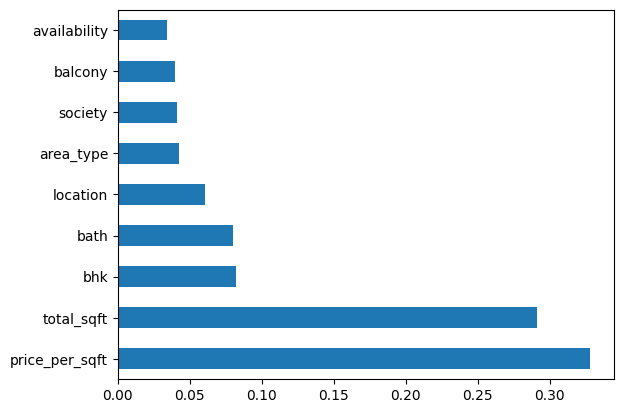

In [65]:
ranked_features=pd.Series(selection_model.feature_importances_,index=features_df.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [66]:
#### Remove The correlated
threshold=0.8

In [67]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [68]:
cor_column_set = correlation(features_df,threshold)
cor_column_set

{'bhk'}

In [69]:


def drop_column(df,input_set):
    val = input_set.pop()
    df.drop(columns=[val], inplace=True)
    return df

features_df = drop_column(features_df,cor_column_set)

In [70]:
features_df.shape

(12567, 8)

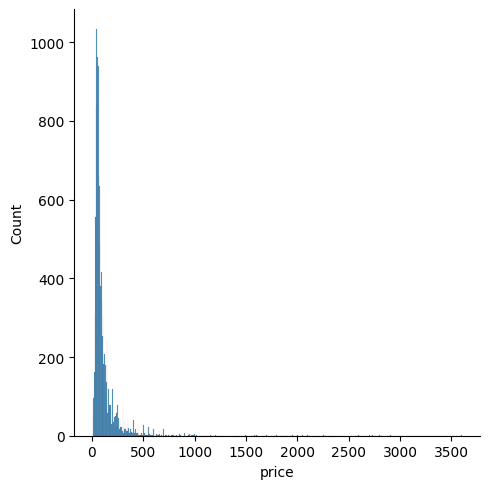

In [238]:
sns.displot(y['price'])

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test ,y_train, y_test = train_test_split(features_df,y,test_size=0.2, random_state=0)

In [243]:
X_train

,area_type,availability,location,society,total_sqft,bath,balcony,price_per_sqft
4890,8738,17,38,10,1749.00,3.0,1.0,6689.536878
11222,8738,9860,55,14,1255.00,2.0,2.0,4171.314741
8696,8738,200,2451,4876,1275.00,2.0,2.0,3686.274510
1036,2347,9860,60,4876,1280.00,2.0,2.0,4531.250000
2398,2347,9860,2451,2,1000.00,2.0,2.0,5300.000000
...,...,...,...,...,...,...,...,...
5155,8738,9860,31,4876,1058.00,2.0,2.0,8034.026465
3464,8738,9860,54,49,664.00,1.0,1.0,5271.084337
10442,2347,9860,95,4876,1211.00,2.0,1.0,5202.312139
11445,8738,184,21,10,2573.75,4.5,2.0,6836.734694


In [117]:
def removing_sqft_outliers(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (mean-std)) & (subdf.price_per_sqft < (mean+std))]
        df_output = pd.concat([df_output, gen_df], ignore_index=True)
    return df_output
df = removing_sqft_outliers(df)
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000
mean,1509.996956,2.474032,91.718675,2.576347,5669.007067
std,883.210082,0.986908,88.327858,0.900592,2292.794131
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4249.917219
50%,1286.000000,2.000000,67.000000,2.000000,5176.565008
75%,1650.000000,3.000000,100.000000,3.000000,6431.808627
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [120]:
def removing_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, locaction_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in df.groupby('location'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5 :
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index_values)
    return df.drop(exclude_indices, axis='index')

In [121]:
df = removing_bhk_outliers(df)

In [122]:
df.shape

(10282, 7)

In [123]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [124]:
df.drop(columns=['size', 'price_per_sqft'], inplace= True)

In [125]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [126]:
df.to_parquet('cleaned_data.parquet')

In [2]:
df = pd.read_parquet('cleaned_data.parquet')

In [3]:
X = df.drop(columns=['price'])
y = df['price']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
X = features_df.drop(columns=['price'], axis=1)
y = features_df['price']

In [7]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [8]:
print(X_train.shape)
print(X_test.shape)

(8225, 4)
(2057, 4)


In [11]:
df[df['location'] == 'Kalkere']

,location,total_sqft,bath,price,bhk
4005,Kalkere,856.0,2.0,40.0,2
4006,Kalkere,925.0,2.0,48.0,2
4007,Kalkere,925.0,2.0,51.0,2
4008,Kalkere,1147.0,2.0,54.0,2
4009,Kalkere,925.0,2.0,42.0,2
4010,Kalkere,1850.0,3.0,95.0,3
4011,Kalkere,925.0,2.0,55.0,2


In [12]:
X_train.head()

,location,total_sqft,bath,bhk
4299,Kanakpura Road,1665.0,3.0,3
2929,Hebbal,1333.0,2.0,2
5615,R.T. Nagar,1500.0,4.0,4
1594,Chandapura,1323.0,2.0,3
5919,Ramagondanahalli,1610.0,2.0,3


In [13]:
X_test.head()

,location,total_sqft,bath,bhk
8428,other,1550.0,3.0,3
487,Anekal,2400.0,4.0,3
5428,Old Airport Road,3496.0,4.0,4
2664,Haralur Road,1225.0,2.0,2
7755,Whitefield,1200.0,3.0,3


In [46]:
# linear reg

In [14]:
column_transformer = make_column_transformer((OneHotEncoder(sparse=False), [0]), remainder='passthrough')
scaler = StandardScaler()
lin_reg = LinearRegression(normalize=True)

In [21]:
lin_pipe = make_pipeline(column_transformer, scaler, lin_reg)

lin_pipe.fit(X_train,y_train)

y_pred = lin_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Anaconda\envs\machine-learning-env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


R2 score 0.8155619484993011
MAE 18.93240791692836


In [49]:
# Lasso
lasso_reg = Lasso()
lasso_pipe = make_pipeline(column_transformer, scaler, lasso_reg)

lasso_pipe.fit(X_train,y_train)

y_pred = lasso_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8019497346206428
MAE 20.473203164822376


In [50]:
# Ridge
ridge_reg = Ridge()
ridge_pipe = make_pipeline(column_transformer, scaler, ridge_reg)

ridge_pipe.fit(X_train,y_train)

y_pred = ridge_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8156741065711806
MAE 18.943405021751172


In [51]:
# knn-reg
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_pipe = make_pipeline(column_transformer, scaler, knn_reg)

knn_pipe.fit(X_train,y_train)

y_pred = knn_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7661486950992137
MAE 19.13129962728893


In [52]:
# decision tree reg
dec_reg = DecisionTreeRegressor(max_depth=8)
dec_pipe = make_pipeline(column_transformer, scaler, dec_reg)

dec_pipe.fit(X_train,y_train)

y_pred = dec_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.702377080635561
MAE 22.447125593120695


In [53]:
# random forest tree reg
rf_reg = RandomForestRegressor(n_estimators=100)
rf_pipe = make_pipeline(column_transformer, scaler, rf_reg)

rf_pipe.fit(X_train,y_train)

y_pred = rf_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8048349701001902
MAE 17.25846518974905


In [54]:
# gradient boost reg
grad_reg = GradientBoostingRegressor(n_estimators=500)
grad_pipe = make_pipeline(column_transformer, scaler, grad_reg)

grad_pipe.fit(X_train,y_train)

y_pred = grad_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8417977459148737
MAE 17.532148004741124


In [55]:
# adaboost
adaB_reg = AdaBoostRegressor(n_estimators=500, learning_rate=0.001)
adaB_pipe = make_pipeline(column_transformer, scaler, adaB_reg)

adaB_pipe.fit(X_train,y_train)

y_pred = adaB_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6174457084476425
MAE 25.980845713035414


In [56]:
# extra tree reg
extraT_reg = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_features=0.75,
                            max_depth=15)
extraT_pipe = make_pipeline(column_transformer, scaler, extraT_reg)

extraT_pipe.fit(X_train,y_train)

y_pred = extraT_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.805199959927355
MAE 19.69161500570004


In [57]:
# SVR
svr_reg = SVR(kernel='rbf', C=10000, epsilon=0.1)
svr_pipe = make_pipeline(column_transformer, scaler, svr_reg)

svr_pipe.fit(X_train,y_train)

y_pred = svr_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8282414493050108
MAE 16.567493803468818


In [58]:
# xgboost
xgb_reg = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)
xgb_pipe = make_pipeline(column_transformer, scaler, xgb_reg)

xgb_pipe.fit(X_train,y_train)

y_pred = xgb_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8026763153479328
MAE 17.67210396743945


In [59]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [60]:
# VotingRegressor
rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

voting_reg = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])
voting_pipe = make_pipeline(column_transformer, scaler, voting_reg)

voting_pipe.fit(X_train,y_train)

y_pred = voting_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8086895335395937
MAE 19.23519147397326


In [61]:
# StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

stacking_reg = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))
stacking_pipe = make_pipeline(column_transformer, scaler, stacking_reg)

stacking_pipe.fit(X_train,y_train)

y_pred = stacking_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8194727539806324
MAE 19.63065728821463


In [68]:
import pickle

pickle.dump(grad_pipe,open('grad_reg_pipeline.pkl','wb'))

In [69]:
# import pickle
model_pipeline = pickle.load(open('grad_reg_pipeline.pkl','rb'))

In [70]:
model_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=500))])

In [65]:
# df = pd.read_parquet('cleaned_data.parquet')
# df.tail()

In [71]:
# X_val = [['other', 1075.0, 2.0, 2]]
input_data = ('other', 1075.0, 2.0, 2)

# changing the data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [72]:
val_pred = model_pipeline.predict(input_data_reshaped)

c:\Anaconda\envs\machine-learning-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [75]:
type(val_pred[0])

numpy.float64